In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats.distributions import gamma
import numpy as np
import seaborn as sns
import scipy.stats
import scipy.optimize
import math
import warnings

In [177]:
path_to_file = 'final_book_dataset_kaggle.csv'
source_df = pd.read_csv(path_to_file)

source_df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


In [178]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          946 non-null    object 
 1   author         824 non-null    object 
 2   price          944 non-null    float64
 3   pages          934 non-null    float64
 4   avg_reviews    823 non-null    float64
 5   n_reviews      946 non-null    int64  
 6   star5          946 non-null    float64
 7   star4          946 non-null    float64
 8   star3          946 non-null    float64
 9   star2          946 non-null    float64
 10  star1          946 non-null    float64
 11  dimensions     914 non-null    object 
 12  weight         943 non-null    object 
 13  language       943 non-null    object 
 14  publisher      942 non-null    object 
 15  ISBN_13        945 non-null    object 
 16  link           946 non-null    object 
 17  complete_link  946 non-null    object 
dtypes: float64


source_df = source_df.astype({"opening_weekend": "Int64"})


In [179]:
source_df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


In [180]:
df = source_df[['price','pages','avg_reviews','n_reviews']] 
df

,price,pages,avg_reviews,n_reviews
0,24.49,272.0,4.6,184
1,26.00,301.0,4.5,599
2,50.76,446.0,5.0,33
3,44.80,347.0,4.5,27
4,36.99,413.0,4.5,970
...,...,...,...,...
941,28.33,832.0,4.6,327
942,59.23,260.0,4.3,6
943,129.99,704.0,4.5,1025
944,47.76,252.0,4.6,145


In [181]:
df= df.head(900)
df = df.fillna(0)
df= df[(df['avg_reviews'] > 0) &  (df['n_reviews'] < 200) &  (df['n_reviews'] > 10)  &  (df['pages'] < 1000 )]

In [182]:
df

,price,pages,avg_reviews,n_reviews
0,24.49,272.0,4.6,184
2,50.76,446.0,5.0,33
3,44.80,347.0,4.5,27
10,25.49,432.0,4.6,35
11,49.99,574.0,4.1,16
...,...,...,...,...
893,104.50,460.0,4.5,17
894,40.49,544.0,4.3,112
896,75.31,784.0,4.0,69
897,181.35,800.0,4.1,112


df = df.loc[(df['n_reviews'] <= 700)]
df=df.reset_index(drop=True)
df = df.head(300)
df

In [183]:
def number_of_cols(df_num):
    rows = df_num.shape[0]
    num = np.around(1 + 3.32 * np.log(rows)).astype('int64')
    return num

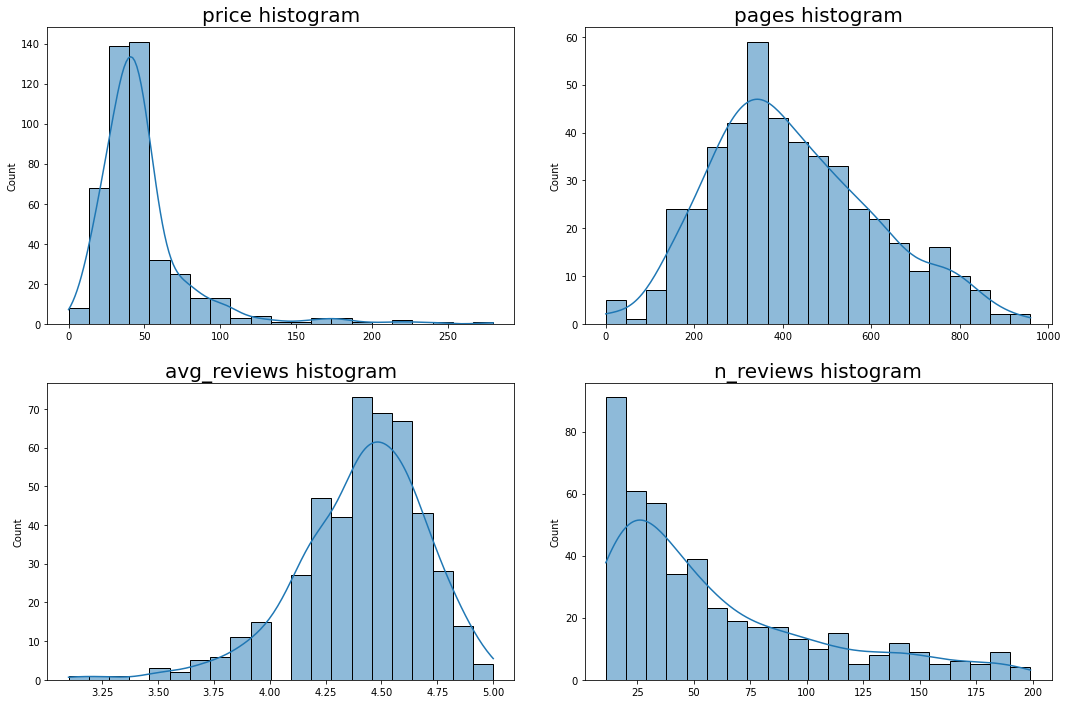

In [184]:
import seaborn as sns
plt.figure(figsize=(18,12))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.subplots_adjust(wspace=0.15, hspace=0.2)
    plt.title(df.columns[i-1] + ' histogram', fontsize=20)
    plt.xlabel(' ')
    sns.histplot(data=df, x=df.columns[i-1],bins=number_of_cols(df), kde=True)


In [185]:
def order_statistic(column):
    q = [0.1, 0.25, 0.5, 0.75, 0.9]
    quanls = column.quantile(q=q)
    col_min = column.min()
    col_max = column.max()
    return [quanls,col_min,col_max]

def plot_box(column, quants):
    figure, ax = plt.subplots(1, 1, figsize=(10, 3))
    
    boxplot = sns.boxplot(column, ax=ax, linewidth=0.5)
    
    for quant in quants:
        ax.axvline(quant, color='black', linestyle='--', alpha=0.5)
        
    plt.title(column.name)
    plt.show()

       price
0.10  20.890
0.25  32.990
0.50  41.990
0.75  51.990
0.90  79.168


D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


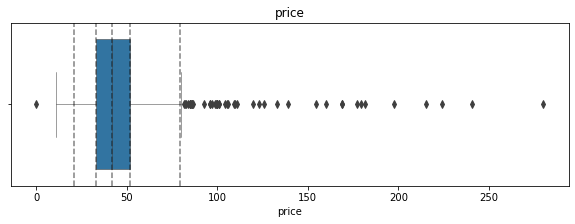

      pages
0.10  208.0
0.25  288.0
0.50  394.0
0.75  540.0
0.90  688.0


D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


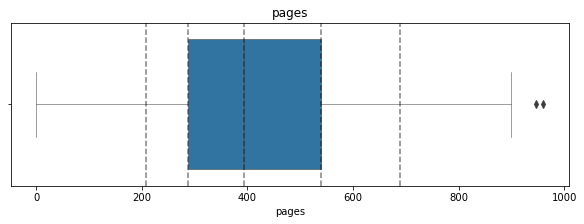

D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      avg_reviews
0.10         4.10
0.25         4.20
0.50         4.40
0.75         4.60
0.90         4.72


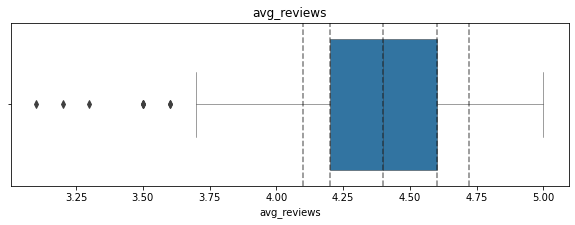

      n_reviews
0.10       15.0
0.25       22.0
0.50       43.0
0.75       84.5
0.90      139.0


D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


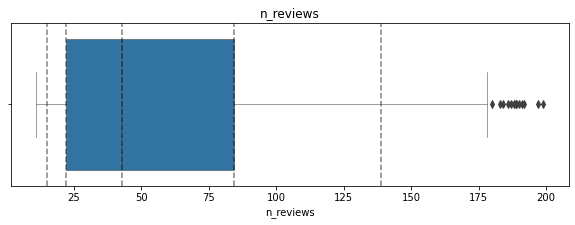

In [186]:
for col in list(df.columns):
    quants, col_min,col_max = order_statistic(df[col])
    print(pd.DataFrame(quants))
    plot_box(df[col],quants)

In [187]:
def draw_dists(truncated_array,dists):
    
    figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    subplot = sns.histplot(truncated_array, kde=False,bins= number_of_cols(df), stat='density',color = 'y')
      
    x = np.linspace(np.min(truncated_array), np.max(truncated_array))
    
    for dist in dists:
        name = type(dist).__name__
        res = dist.fit(truncated_array)
        print("Dist: ",name, "val:", res)
        y = dist.pdf(x, *res)
        sns.lineplot(x, y, label=name)
        
    plt.legend()

Dist:  norm_gen val: (423.56427015250546, 184.44837888962857)
Dist:  beta_gen val: (8.900881409474305, 37.87267866214599, -193.12189275093328, 3240.747586872126)
Dist:  logistic_gen val: (413.0409705712204, 105.8280286219414)


D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


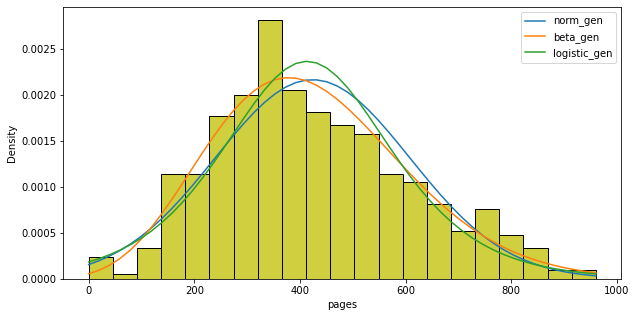

In [313]:
dists = [scipy.stats.norm,scipy.stats.beta,scipy.stats.logistic] # scipy.stats.lognorm
draw_dists(df.pages,dists)

Dist:  exponnorm_gen val: (2.6409727097198794, 24.289855372771058, 9.268713977488282)
Dist:  chi2_gen val: (7.223138741906958, -1.179233816445373, 6.914925282824081)
Dist:  lognorm_gen val: (0.46876891763559436, -5.364820646680137, 47.98951845933654)
Dist:  rayleigh_gen val: (2.7413217115456794, 39.82549984206685)


D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass 

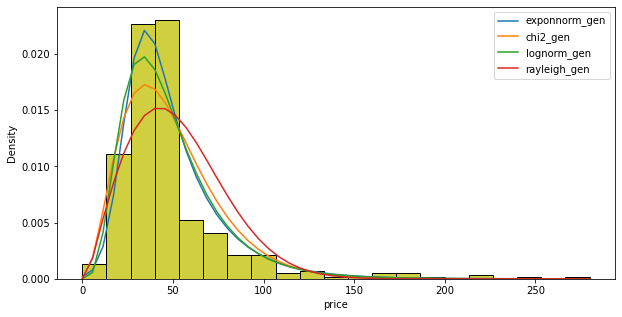

In [189]:
dists = [scipy.stats.exponnorm,scipy.stats.chi2,scipy.stats.lognorm, scipy.stats.rayleigh] 
draw_dists(df.price,dists)

Dist:  exponnorm_gen val: (1835.384465364943, 10.939483431543998, 0.026418828756195223)
Dist:  lognorm_gen val: (1.0943729690451058, 8.330490917526493, 31.175299323975004)


D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


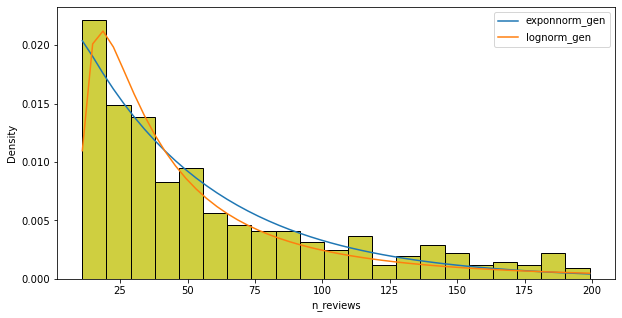

In [221]:
dists = [scipy.stats.exponnorm,scipy.stats.lognorm] 
draw_dists(df.n_reviews,dists)

Dist:  lognorm_gen val: (0.9432555691271867, 7.293202689802278, 27.818003963891194)
Dist:  exponnorm_gen val: (2170.424614635953, 10.959103910170189, 0.017096250388167075)


D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\itmo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


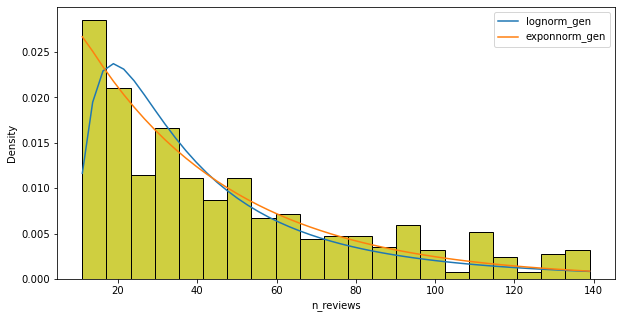

In [222]:
N_reviews = df.n_reviews[df.n_reviews.between(df.n_reviews.quantile(0.0),df.n_reviews.quantile(0.9))]
dists = [scipy.stats.lognorm, scipy.stats.exponnorm] 
draw_dists(N_reviews,dists)

In [261]:
def check_dist(column,dist,tol=0):
    
#     count_bins = round(1+3.32*math.log(column.shape[0]))
    mle = dist.fit(column)
    print('MLE {2}: {0}, {1}'.format(mle[0],mle[1],type(dist).__name__))
    
    val_quants = np.linspace(0,1,2)[1:-1]
    
    def MSE(res):
        return sum((column.quantile(val_quants).values - 
                    dist(*res).ppf(val_quants))**2)

    min_res = scipy.optimize.minimize(MSE,mle) if tol == 0 else scipy.optimize.minimize(MSE,mle,tol=tol)
    
    if(min_res.success):
        print('MSE {0}: {1}'.format(type(dist).__name__, min_res.x))
    else:
        print('MSE error')
    

In [262]:
print('pages')
check_dist(df.pages,scipy.stats.norm) 
check_dist(df.pages,scipy.stats.beta)
check_dist(df.pages,scipy.stats.logistic)

pages
MLE norm_gen: 423.56427015250546, 184.44837888962857
MSE norm_gen: [423.56427015 184.44837889]
MLE beta_gen: 8.900881409474305, 37.87267866214599
MSE beta_gen: [   8.90088141   37.87267866 -193.12189275 3240.74758687]
MLE logistic_gen: 413.0409705712204, 105.8280286219414
MSE logistic_gen: [413.04097057 105.82802862]


In [276]:
best_pages_data = [8.900881409474305, 37.87267866214599]

In [196]:
print('price')
check_dist(df.price,scipy.stats.exponnorm) 
check_dist(df.price,scipy.stats.rayleigh)
check_dist(df.price,scipy.stats.chi2)
check_dist(df.price,scipy.stats.lognorm)

price
MLE exponnorm_gen: 2.6409727097198794, 24.289855372771058
MSE exponnorm_gen: [ 2.64097271 24.28985537  9.26871398]
MLE rayleigh_gen: 2.7413217115456794, 39.82549984206685
MSE rayleigh_gen: [ 2.74132171 39.82549984]
MLE chi2_gen: 7.223138741906958, -1.179233816445373
MSE chi2_gen: [ 7.22313874 -1.17923382  6.91492528]
MLE lognorm_gen: 0.46876891763559436, -5.364820646680137
MSE lognorm_gen: [ 0.46876892 -5.36482065 47.98951846]


In [200]:
best_price_data = [ 2.6409727097198794, 24.289855372771058]

In [201]:
print('n_reviews')
check_dist(df.n_reviews,scipy.stats.exponnorm) 
check_dist(df.n_reviews,scipy.stats.lognorm)

n_reviews
MLE exponnorm_gen: 1835.384465364943, 10.939483431543998
MSE exponnorm_gen: [1.83538447e+03 1.09394834e+01 2.64188288e-02]
MLE lognorm_gen: 1.0943729690451058, 8.330490917526493
MSE lognorm_gen: [ 1.09437297  8.33049092 31.17529932]


In [202]:
best_n_reviews_data = [1.0943729690451058, 8.330490917526493]

In [203]:
def qq_plot(column,dist):
    
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))

    res = dist.fit(column)
    scipy.stats.probplot(column, dist=dist, sparams=res, plot=ax)

    ax.get_lines()[0].set_marker('o')
    ax.get_lines()[0].set_color('blue')
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    plt.show()

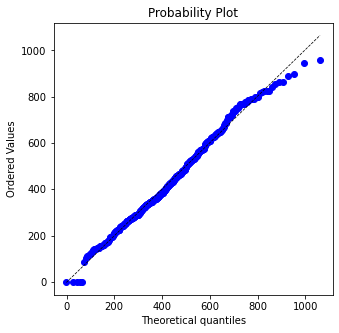

In [204]:
qq_plot(df.pages,scipy.stats.beta)

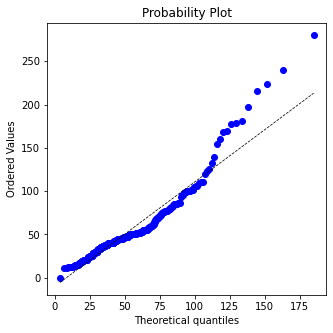

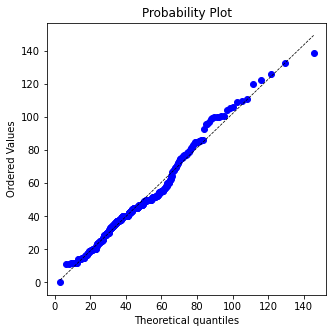

In [288]:
qq_plot(df.price,scipy.stats.exponnorm)
qq_plot(cBMI,scipy.stats.exponnorm)

In [235]:
cBMI =  df.price[df.price.between( 0,150)]

In [250]:
cN_reviews = df.n_reviews[df.n_reviews.between( 0,100)]
cN_reviews = cN_reviews[cN_reviews.between(cN_reviews.quantile(0.0),cN_reviews.quantile(0.9))]

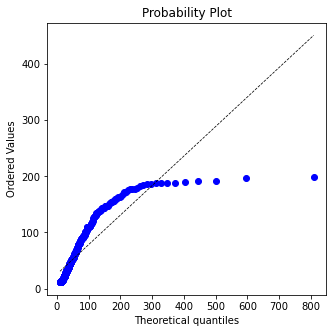

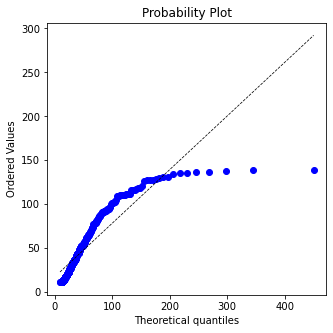

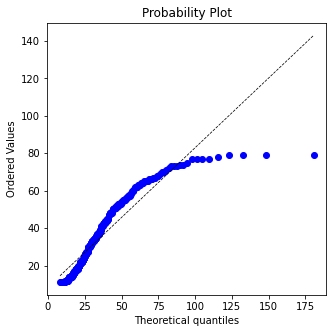

In [251]:
qq_plot(df.n_reviews,scipy.stats.lognorm)
qq_plot(N_reviews,scipy.stats.lognorm)
qq_plot(cN_reviews,scipy.stats.lognorm)

In [207]:
def testing_ktest(column,dist,dist_name,params):
    
    params = dist.fit(column)
    ks = scipy.stats.kstest(column, dist_name, params, N=100)
    print(ks)
    
#     x = np.linspace(np.min(column), np.max(column), column.shape[0])  
#     y = dist.pdf(x, *params)
#     t_st = scipy.stats.ttest_ind(column,y)
    
    
    
def testing_by_tt(column,dist,param):
    
    val_quants = np.linspace(0,1,302)[1:-1]
    
    a = column.quantile(val_quants).values
    b = dist(*param).ppf(val_quants)

    tt = scipy.stats.ttest_ind(a,b)
    print(tt)

In [208]:
print('pages')
testing_ktest(df.pages,scipy.stats.beta,'beta',best_pages_data)

testing_by_tt(df.pages,scipy.stats.beta, best_pages_data)

pages
KstestResult(statistic=0.04062107098877071, pvalue=0.423874431398905)
Ttest_indResult(statistic=40.31633582062188, pvalue=1.1380377934243854e-172)


In [209]:
print('price')
testing_ktest(df.price,scipy.stats.exponnorm,'lognorm',best_price_data)

testing_by_tt(df.price,scipy.stats.exponnorm, best_price_data)

price
KstestResult(statistic=0.24425077316885072, pvalue=1.3500831246317623e-24)
Ttest_indResult(statistic=12.169265461084573, pvalue=1.3507211513912587e-30)


In [210]:
print('n_reviews')
testing_ktest(df.n_reviews,scipy.stats.lognorm,'lognorm',best_n_reviews_data)

testing_by_tt(df.n_reviews,scipy.stats.lognorm, best_n_reviews_data)

n_reviews
KstestResult(statistic=0.05230576074854176, pvalue=0.15659722662308018)
Ttest_indResult(statistic=18.111595807499068, pvalue=8.917225968219456e-59)


# Метод обратной функции

In [319]:
def cont_inverse_sampling(array, distribution):
    args = distribution.fit(array)
    x_array = np.random.rand(100)
    inverse = distribution.ppf(x_array, *args)
    sns.histplot(array, stat='density', label = 'distribution')
    sns.kdeplot(x=inverse, label = 'sample')
    plt.legend()


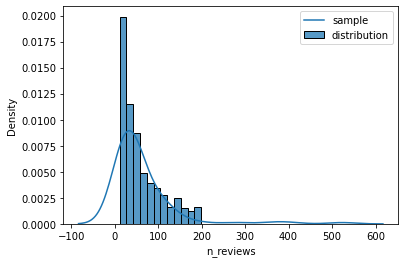

In [320]:
cont_inverse_sampling(df['n_reviews'], scipy.stats.lognorm)

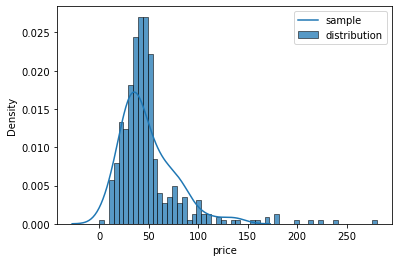

In [321]:
cont_inverse_sampling(df['price'], scipy.stats.exponnorm)

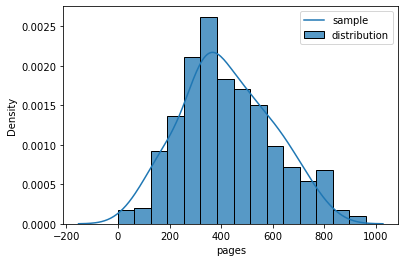

In [322]:
cont_inverse_sampling(df['pages'], scipy.stats.beta)

In [333]:
def accept_reject(array, distribution, M, params):
    args = distribution.fit(array)
    samples = []
    N = 10000
    for _ in range(N):
        x = np.random.normal(*params)
        prob_accept = distribution.pdf(x, *args) / (M * scipy.stats.norm.pdf(x, *params))
        if np.random.random() < prob_accept:
            samples.append(x)
    plt.hist(samples, bins=25, density=True, label = 'sample')
    x_plot = np.linspace(np.min(array), np.max(array), 1000)
    y_plot = distribution.pdf(x_plot, *args)
    






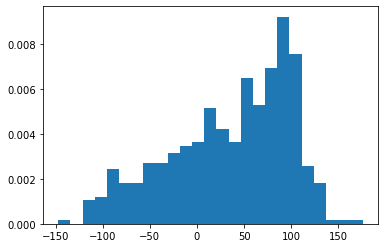

In [342]:
accept_reject(df['pages'], scipy.stats.logistic, 1, best_pages_data)

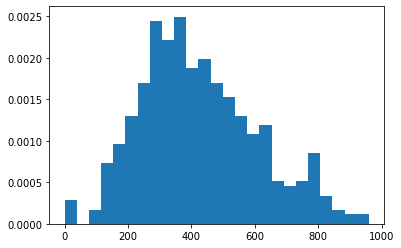

In [347]:
plt.hist(df['pages'], bins=25, density=True, label = 'sample')
x_plot = np.linspace(np.min(df['pages']), np.max(df['pages']), 1000)


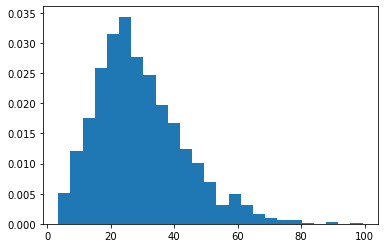

In [336]:
accept_reject(df['price'], scipy.stats.rayleigh, 1, best_price_data)

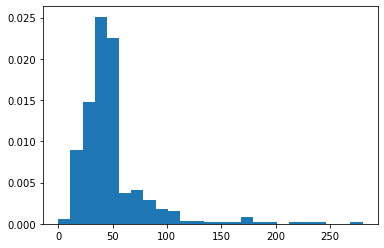

In [348]:
plt.hist(df['price'], bins=25, density=True, label = 'sample')
x_plot = np.linspace(np.min(df['price']), np.max(df['price']), 1000)

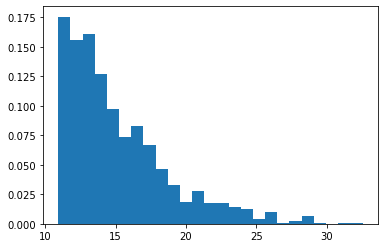

In [327]:
accept_reject(df['n_reviews'], scipy.stats.exponnorm, 1,best_n_reviews_data)

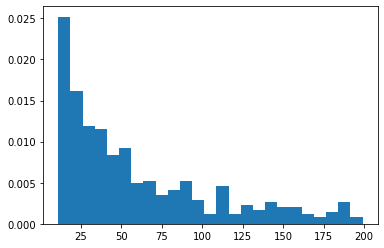

In [349]:
plt.hist(df['n_reviews'], bins=25, density=True, label = 'sample')
x_plot = np.linspace(np.min(df['n_reviews']), np.max(df['n_reviews']), 1000)